# Manifold Learning (baseline for angle recovery from estimated distances)

In [1]:
import os
import h5py
from sklearn.neighbors import NearestNeighbors
import numpy as np   
import ipyvolume as ipv
import time

import sys
sys.path.append("..") 
from cryoem.plots import plot_projection, plot_projections
from cryoem.projections import RotationMatrix

## Read generated data

Data was generated with:
```
python generator.py -mrc generated_data/bgal.mrc -num 5000
```

In [2]:
angle_ranges = "2.0,0.4,2.0"
angle_shift = "0.0,0.0,0.0"
dir_name = "../data/bgal/"
projections_filename = f"bgal_ProjectionsAngles_ProjNber5000_AngCoverage{angle_ranges}_AngShift{angle_shift}"


# load structures
data = h5py.File(os.path.join(dir_name, f"{projections_filename}.h5"), 'r')

#### With Rotation Matrix

In [3]:
all_vectors = RotationMatrix(data["Angles"])

ipv.figure(width=500, height=400)
ipv.scatter(all_vectors[:,0], all_vectors[:,2], all_vectors[:,1], marker="sphere", color="blue", size=1)
ipv.pylab.xlim(-1, 1)
ipv.pylab.ylim(-1, 1)
ipv.pylab.zlim(-1, 1)
ipv.show()

## Manifold learning MDS

In [6]:
X = np.reshape(data["Projections"], (data["Projections"].shape[0], -1))
X.shape

(5000, 18496)

In [6]:
from sklearn.manifold import MDS

start_time = time.time()

embedding = MDS(n_components=3)
X_transformed = embedding.fit_transform(X)

print(f"--- {time.time() - start_time} seconds ---")

--- 488.7033085823059 seconds ---


In [14]:
print(X_transformed.shape)
X_transformed

(5000, 3)


array([[  9.28022256, -71.35540865, 115.42811523],
       [163.04295602, -20.90786678,  73.13073866],
       [ 87.20967557,  49.73907979, -84.24217491],
       ...,
       [-82.74423824,  23.53460067,  94.97148031],
       [-42.14046352, 148.19188913,  56.25249309],
       [-66.2567255 ,  87.35590608, -29.09346182]])

In [8]:
start_time = time.time()

embedding_fit = MDS(n_components=3).fit(X)

print(f"--- {time.time() - start_time} seconds ---")

--- 505.9851200580597 seconds ---


In [20]:
print(embedding_fit.dissimilarity_matrix_.shape)
embedding_fit.dissimilarity_matrix_

(5000, 5000)


array([[  0.        , 244.26881617, 220.41817364, ..., 189.27407468,
        234.73836522, 197.06920772],
       [244.26881617,   0.        , 258.75686946, ..., 250.92170471,
        243.75475135, 251.30517186],
       [220.41817364, 258.75686946,   0.        , ..., 214.07970889,
        215.55276875, 180.79356955],
       ...,
       [189.27407468, 250.92170471, 214.07970889, ...,   0.        ,
        196.70892398, 197.97948123],
       [234.73836522, 243.75475135, 215.55276875, ..., 196.70892398,
          0.        , 200.5217067 ],
       [197.06920772, 251.30517186, 180.79356955, ..., 197.97948123,
        200.5217067 ,   0.        ]])

In [30]:
dist = np.linalg.norm(embedding_fit.embedding_[0]-embedding_fit.embedding_[2])
dist

277.96153093989983

In [29]:
dist = np.linalg.norm(X[1]-X[0])
dist

244.26881616640435

In [21]:
embedding_fit.embedding_

array([[  67.51565455,   -3.17492915, -129.04301669],
       [ 165.11757368,  -29.86625087,   65.69061481],
       [ -60.51393515,  -25.71320212,  116.6459393 ],
       ...,
       [  24.30371924,  -83.73604873,  -60.08123523],
       [ -39.89831985, -148.26040525,   33.56343468],
       [-108.61546303,  -24.43798288,  -61.12033986]])

In [13]:
np.save(f'data/MDS_{projections_filename}_X_transformed', X_transformed) 
np.save(f'data/MDS_{projections_filename}_embedding_fit', embedding_fit) 

---

Automatically created module for IPython interactive environment
Computing random projection
Computing PCA projection
Computing Isomap projection
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63544e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.360573
Computing Hessian LLE embedding
Done. Reconstruction error: 0.212806
Computing LTSA embedding
Done. Reconstruction error: 0.212805
Computing MDS embedding
Done. Stress: 140490921.329353
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding


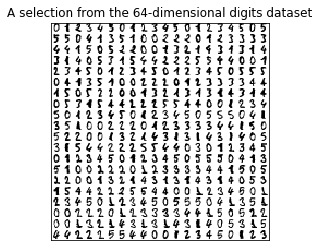

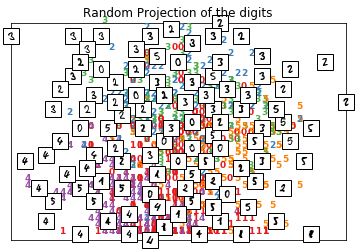

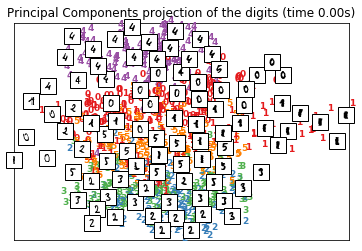

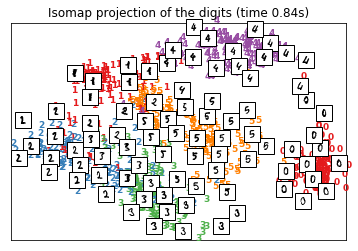

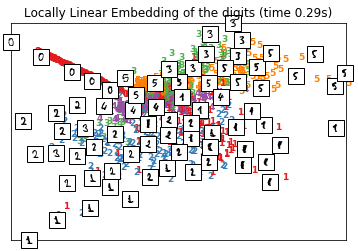

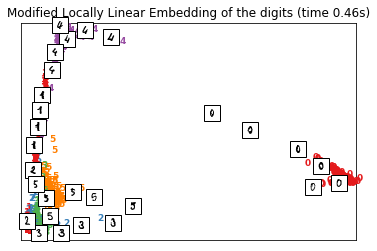

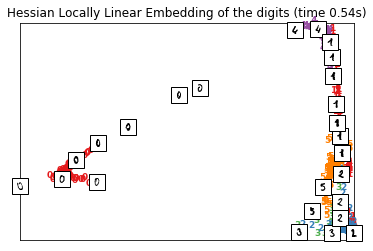

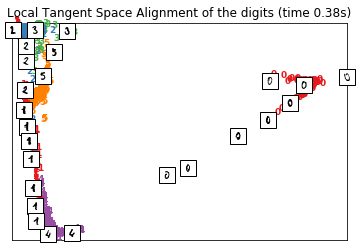

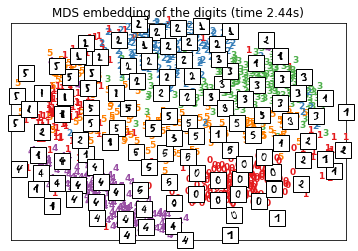

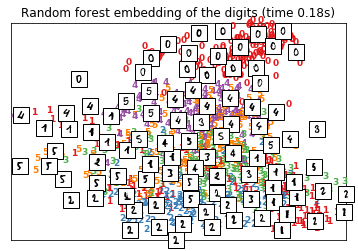

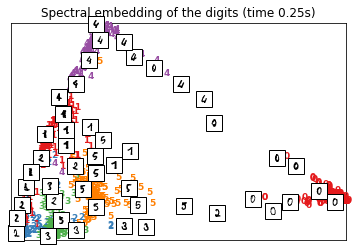

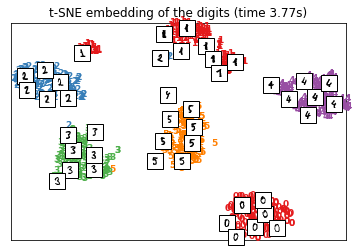

In [32]:
# # License: BSD 3 clause (C) INRIA 2011

# print(__doc__)
# from time import time

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import offsetbox
# from sklearn import (manifold, datasets, decomposition, ensemble,
#                      discriminant_analysis, random_projection, neighbors)

# digits = datasets.load_digits(n_class=6)
# X = digits.data
# y = digits.target
# n_samples, n_features = X.shape
# n_neighbors = 30


# # ----------------------------------------------------------------------
# # Scale and visualize the embedding vectors
# def plot_embedding(X, title=None):
#     x_min, x_max = np.min(X, 0), np.max(X, 0)
#     X = (X - x_min) / (x_max - x_min)

#     plt.figure()
#     ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(y[i]),
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(X.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
#     plt.xticks([]), plt.yticks([])
#     if title is not None:
#         plt.title(title)


# # ----------------------------------------------------------------------
# # Plot images of the digits
# n_img_per_row = 20
# img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
# for i in range(n_img_per_row):
#     ix = 10 * i + 1
#     for j in range(n_img_per_row):
#         iy = 10 * j + 1
#         img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')


# # ----------------------------------------------------------------------
# # Random 2D projection using a random unitary matrix
# print("Computing random projection")
# rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
# X_projected = rp.fit_transform(X)
# plot_embedding(X_projected, "Random Projection of the digits")


# #----------------------------------------------------------------------
# # Projection on to the first 2 principal components

# print("Computing PCA projection")
# t0 = time()
# X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
# plot_embedding(X_pca,
#                "Principal Components projection of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # Projection on to the first 2 linear discriminant components

# # print("Computing Linear Discriminant Analysis projection")
# # X2 = X.copy()
# # X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
# # t0 = time()
# # X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
# # plot_embedding(X_lda,
# #                "Linear Discriminant projection of the digits (time %.2fs)" %
# #                (time() - t0))


# # ----------------------------------------------------------------------
# # Isomap projection of the digits dataset
# print("Computing Isomap projection")
# t0 = time()
# X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
# print("Done.")
# plot_embedding(X_iso,
#                "Isomap projection of the digits (time %.2fs)" %
#                (time() - t0))


# # ----------------------------------------------------------------------
# # Locally linear embedding of the digits dataset
# print("Computing LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='standard')
# t0 = time()
# X_lle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_lle,
#                "Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# # ----------------------------------------------------------------------
# # Modified Locally linear embedding of the digits dataset
# print("Computing modified LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='modified')
# t0 = time()
# X_mlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_mlle,
#                "Modified Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# # ----------------------------------------------------------------------
# # HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# # ----------------------------------------------------------------------
# # LTSA embedding of the digits dataset
# print("Computing LTSA embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='ltsa')
# t0 = time()
# X_ltsa = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # MDS  embedding of the digits dataset
# print("Computing MDS embedding")
# clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
# t0 = time()
# X_mds = clf.fit_transform(X)
# print("Done. Stress: %f" % clf.stress_)
# plot_embedding(X_mds,
#                "MDS embedding of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # Random Trees embedding of the digits dataset
# print("Computing Totally Random Trees embedding")
# hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
#                                        max_depth=5)
# t0 = time()
# X_transformed = hasher.fit_transform(X)
# pca = decomposition.TruncatedSVD(n_components=2)
# X_reduced = pca.fit_transform(X_transformed)

# plot_embedding(X_reduced,
#                "Random forest embedding of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # Spectral embedding of the digits dataset
# print("Computing Spectral embedding")
# embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
#                                       eigen_solver="arpack")
# t0 = time()
# X_se = embedder.fit_transform(X)

# plot_embedding(X_se,
#                "Spectral embedding of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # t-SNE embedding of the digits dataset
# print("Computing t-SNE embedding")
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
# t0 = time()
# X_tsne = tsne.fit_transform(X)

# plot_embedding(X_tsne,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # # NCA projection of the digits dataset
# # print("Computing NCA projection")
# # nca = neighbors.NeighborhoodComponentsAnalysis(n_components=2, random_state=0)
# # t0 = time()
# # X_nca = nca.fit_transform(X, y)

# # plot_embedding(X_nca,
# #                "NCA embedding of the digits (time %.2fs)" %
# #                (time() - t0))

# plt.show()

Automatically created module for IPython interactive environment
Computing random projection
Computing PCA projection
Computing MDS embedding
Done. Stress: 82318561220.996185
Computing Spectral embedding
Computing t-SNE embedding


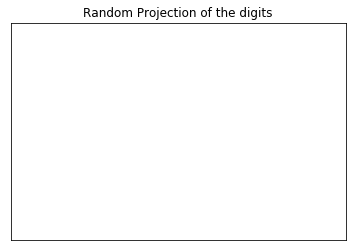

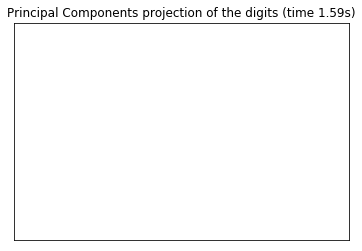

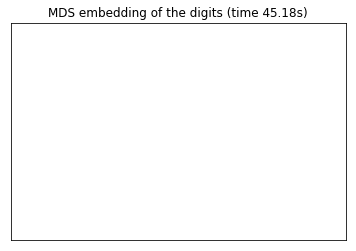

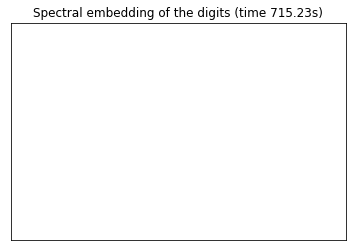

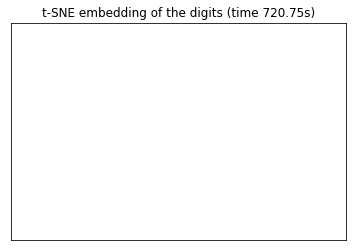

In [4]:
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

#digits = datasets.load_digits(n_class=6)
#X = digits.data
X = np.reshape(data["Projections"], (data["Projections"].shape[0], -1))

# y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(y[i]),
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


# ----------------------------------------------------------------------
# Plot images of the digits
# n_img_per_row = 20
# img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
# for i in range(n_img_per_row):
#     ix = 10 * i + 1
#     for j in range(n_img_per_row):
#         iy = 10 * j + 1
#         img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')


# ----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))



# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
# print("Computing Isomap projection")
# t0 = time()
# X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
# print("Done.")
# plot_embedding(X_iso,
#                "Isomap projection of the digits (time %.2fs)" %
#                (time() - t0))


# ----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
# print("Computing LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='standard')
# t0 = time()
# X_lle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_lle,
#                "Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# ----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
# print("Computing modified LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='modified')
# t0 = time()
# X_mlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_mlle,
#                "Modified Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# ----------------------------------------------------------------------
# HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# ----------------------------------------------------------------------
# LTSA embedding of the digits dataset
# print("Computing LTSA embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='ltsa')
# t0 = time()
# X_ltsa = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment of the digits (time %.2fs)" %
#                (time() - t0))

# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
# print("Computing Totally Random Trees embedding")
# hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
#                                        max_depth=5)
# t0 = time()
# X_transformed = hasher.fit_transform(X)
# pca = decomposition.TruncatedSVD(n_components=2)
# X_reduced = pca.fit_transform(X_transformed)

# plot_embedding(X_reduced,
#                "Random forest embedding of the digits (time %.2fs)" %
#                (time() - t0))

# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

---

## k-NN on **projections**

In [5]:
data["Projections"].shape

(5000, 136, 136)

In [6]:
X = np.reshape(data["Projections"], (data["Projections"].shape[0], -1))
X.shape

(5000, 18496)

In [7]:
start_time = time.time()

if not os.path.exists(f'data/{projections_filename}_distances.npy'):
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    connections = nbrs.kneighbors_graph(X).toarray()
    
    np.save(f'data/{projections_filename}_indices', indices)         # Indices of the nearest points in the population matrix
    np.save(f'data/{projections_filename}_distances', distances)     # Array representing the lengths to points
    np.save(f'data/{projections_filename}_connections', connections) # Sparse graph showing the connections between neighboring points
    
else:
    indices     = np.load(f'data/{projections_filename}_indices.npy')     # shape: NUM_IMGS, NUM_NEIGHBOURS
    distances   = np.load(f'data/{projections_filename}_distances.npy')   # shape: NUM_IMGS, NUM_NEIGHBOURS
    connections = np.load(f'data/{projections_filename}_connections.npy') # shape: NUM_IMGS, NUM_IMGS
    
print(f"--- {time.time() - start_time} seconds ---")

--- 364.5936541557312 seconds ---


In [6]:
connections.shape

(5000, 5000)

In [7]:
indices[0]

array([   0, 4570, 4249, 4309, 4540])

In [8]:
distances[0]

array([ 0.        , 16.3965146 , 23.1244232 , 39.79279798, 40.19101892])

### Plot similar projections

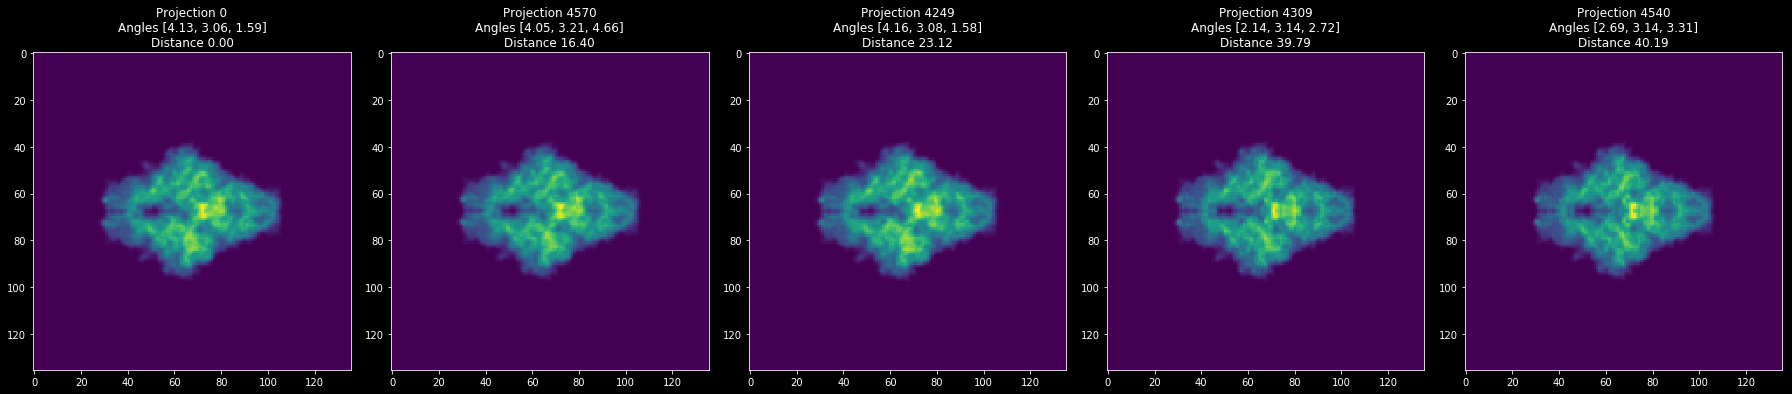

In [9]:
indices1 = indices[0]
distances1 = distances[0]

nrows, ncols = 1, 5
start_row, start_col = 0, 0

images = []
titles = []

cr = [(i, j) for i in range(nrows) for j in range(ncols)]

for datapoint, distance in zip(indices1, distances1):
    image = data["Projections"][datapoint]
    image = image #+ gaussian_noise(shape=image.shape, mean=0, var=0)

    angles = [ float(f"{x:.2f}") for x in data["Angles"][datapoint] ]
    title = f'Projection {datapoint}\nAngles {angles}\nDistance {distance:.2f}'
    
    images.append(image)
    titles.append(title)
        
plot_projections(images, titles, nrows=nrows, ncols=ncols)

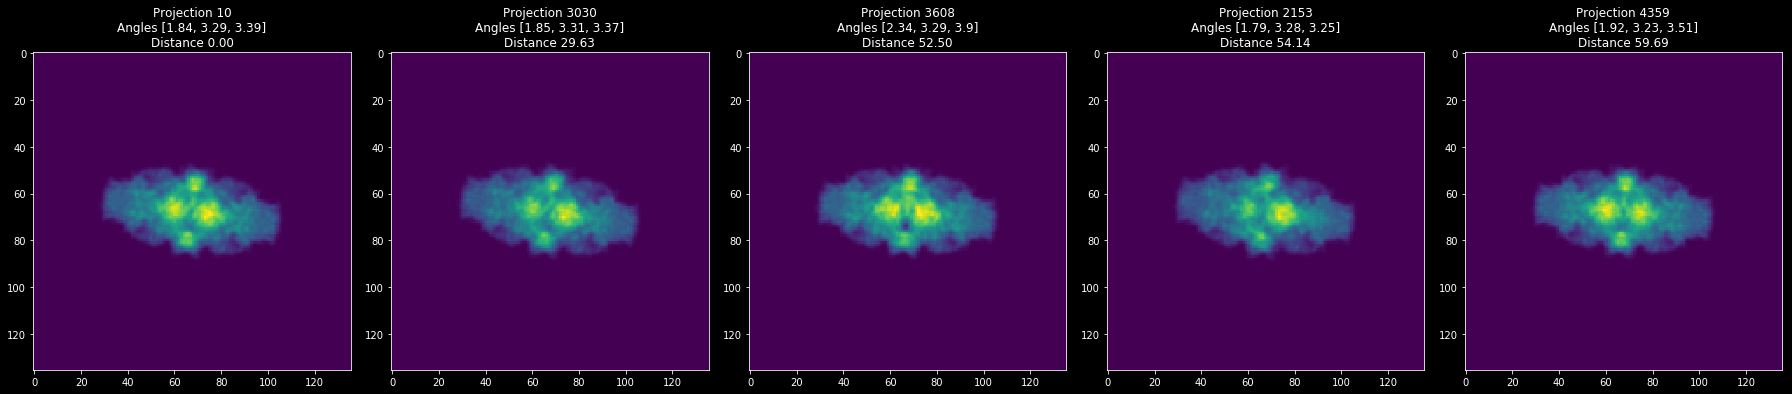

In [10]:
indices1 = indices[10]
distances1 = distances[10]

nrows, ncols = 1, 5
start_row, start_col = 0, 0

images = []
titles = []

cr = [(i, j) for i in range(nrows) for j in range(ncols)]

for datapoint, distance in zip(indices1, distances1):
    image = data["Projections"][datapoint]
    image = image #+ gaussian_noise(shape=image.shape, mean=0, var=0)

    angles = [ float(f"{x:.2f}") for x in data["Angles"][datapoint] ]
    title = f'Projection {datapoint}\nAngles {angles}\nDistance {distance:.2f}'
    
    images.append(image)
    titles.append(title)
        
plot_projections(images, titles, nrows=nrows, ncols=ncols)

##### Debug angles

In [5]:
data["Angles"][0]

array([0.4390055 , 0.23507913, 3.86900802])

In [6]:
min(data["Angles"][:, 0]), max(data["Angles"][:, 0]), np.pi/2, 2*np.pi - np.pi/2

(0.00012167867256658327,
 0.7853747768887392,
 1.5707963267948966,
 4.71238898038469)

---

# Quaternions

Visualizing **SO(3) space**. Following explaination in [wiki](https://en.wikipedia.org/wiki/3D_rotation_group#Topology).

How to use [pyquaternions](http://kieranwynn.github.io/pyquaternion/).


In [15]:
from pyquaternion import Quaternion

## One Quaternion

In [16]:
angle1 = data["Angles"][0]
angle1

array([4.13407857, 3.05641533, 1.59217456])

In [17]:
qx = Quaternion(axis=[1, 0, 0], angle=angle1[0])
qy = Quaternion(axis=[0, 1, 0], angle=angle1[1])
qz = Quaternion(axis=[0, 0, 1], angle=angle1[2])

In [18]:
# compose rotations above
q = qx*qy*qz
q.axis, q.angle

(array([-0.40923767, -0.46891696,  0.78271413]), -1.7472933089540774)

In [19]:
point = list(map(lambda x: np.array([x * q.angle]), q.axis))
point

[array([0.71505825]), array([0.81933546]), array([-1.36763117])]

## All Quaternions

In [20]:
def quaternion(angle):
    """
    Quaternion implements 3 rotations along x, y, z axis. 
    We compose them to get the final (single) rotation.
    """
    qx = Quaternion(axis=[1, 0, 0], angle=angle[0])
    qy = Quaternion(axis=[0, 1, 0], angle=angle[1])
    qz = Quaternion(axis=[0, 0, 1], angle=angle[2])
    
    # compose rotations above
    q = qx*qy*qz

    return q

In [21]:
def quaternion2point(q):
    """ Convert Quaternion to point
    
    We convert Qaternion to the point described with x, y, z values in the Cartesian coordinate system.
    From the Qaternion we get axis and angle. The axis is described as unit vector (ux, uy, uz) and the angle is magnitude of vector.
    Using this two information, we can get the x, y, z coordinates of the point described with axis and angle.
    """
    point = np.array(list(map(lambda x: x * q.angle, q.axis)))
    return point

In [22]:
points1 = np.zeros(data["Angles"].shape)

for idx, angles in enumerate(data["Angles"]):
    point = quaternion2point(quaternion(angles))
    points1[idx, :] = point

points1

array([[ 0.71505825,  0.81933546, -1.36763117],
       [ 1.19184442,  0.91826144,  1.18319472],
       [-0.56564315, -0.84362882,  0.19120245],
       ...,
       [-0.98033571, -0.19442877,  0.99015664],
       [ 0.03581672,  0.25201743, -1.12710559],
       [-0.78496736,  0.51626461, -1.4336596 ]])

In [23]:
ipv.figure(width=500, height=400)
ipv.scatter(points1[:, 0], points1[:, 1], points1[:, 2], marker="sphere", color="blue", size=1.5)
ipv.show()

##### Debug the SO(3) space

In [24]:
max(points1[:,0]), min(points1[:,0])

(2.0994044630378466, -2.1805006731730128)

---

# kNN results in the SO(3)

## Half coverage angles

For kNN calculated on the half coverage angles, we have the following output of the kNN that was estimated on those projections.

In [25]:
indices1 = indices[10]

knn_vectors = np.take(points1, indices1, axis=0)
all_vectors = np.delete(points1, indices1, 0)

ipv.figure(width=500, height=400)
ipv.scatter(knn_vectors[:,0], knn_vectors[:,2], knn_vectors[:,1], marker="diamond", color="red", size=1.5)
ipv.scatter(all_vectors[:,0], all_vectors[:,2], all_vectors[:,1], marker="sphere", color="blue", size=1)
ipv.show()

# Graph visualization

You can use the [PyGSP](https://github.com/epfl-lts2/pygsp) (a python package developed by our lab) to
look at it like a graph. 

Install with: 
```
pip install git+https://github.com/epfl-lts2/pygsp@naspert-nn_refactor. 
```

Then build the graph with graph = pygsp.graphs.Graph(adjacency, coords=embedding),
where adjacency is the kNN matrix, i.e., adjacency[i, j] is the
similarity between nodes i and j  
(you can make it binary, that is **=1** if
node j is one of the k nearest neighbors of node i, **=0** otherwise), and
embedding[i] is the coordinate of node i in that 3D space.

You can also build the kNN graph directly with the PyGSP as graph =
pygsp.graphs.NNGraph(X), where X is the images in pixel space. That is,
the same matrix you're passing to sklearn.neighbors.NearestNeighbors.
Then set the 3D coordinates with graph.coords = embedding. Ideally, we
should integrate sklearn as another backend and allow NNGraph to accept
a custom distance function.

Doing the above should give you intuitions about a graph embedded in SO(3).

In [26]:
np.fill_diagonal(connections, 0)

In [27]:
indices

array([[   0, 4570, 4249, 4309, 4540],
       [   1,  177, 2622, 2615, 2098],
       [   2, 1103, 2655, 2873, 1966],
       ...,
       [4997, 1369, 3297, 2313, 1577],
       [4998,  552, 2779, 2410, 4271],
       [4999,  529, 1403, 4140, 1110]])

In [28]:
distances

array([[  0.        ,  16.3965146 ,  23.1244232 ,  39.79279798,
         40.19101892],
       [  0.        ,  54.69570324,  73.44533676,  77.14007429,
         80.57170189],
       [  0.        ,  52.84137765,  64.23276189,  80.09156354,
         83.04127314],
       ...,
       [  0.        ,   8.65714773,  39.05001869,  56.17222065,
         64.49168177],
       [  0.        ,  49.83394604,  54.43198457,  64.28832688,
         65.31066964],
       [  0.        ,  96.9971292 ,  97.73687771,  98.36979384,
        100.28261244]])

In [29]:
connections

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# graph = pygsp.graphs.Graph(adjacency, coords=embedding)

In [31]:
import pygsp

##### Small graph plot

Adjacency shape: (3, 3)
Embedding shape: (3, 3)


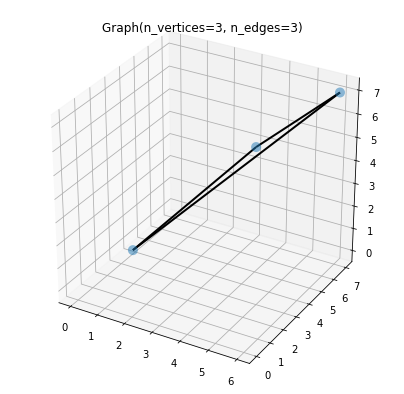

In [32]:
adjacency = np.array([[0,1,1],[1,0,1],[1,1,0]])
embedding = np.array([[1,2,1],[4,5,5],[6,7,7]]) 

print(f"Adjacency shape: {adjacency.shape}")
print(f"Embedding shape: {embedding.shape}")

graph = pygsp.graphs.Graph(adjacency, coords=embedding)
fig, ax = graph.plot(edge_width=2, edge_color='black')
fig.set_figwidth(7)
fig.set_figheight(7)

2019-10-02 23:28:33,543:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are self-loops (non-zeros on the diagonal). The Laplacian will not see them.


Adjacency shape: (1000, 1000)
Embedding shape: (1000, 3)


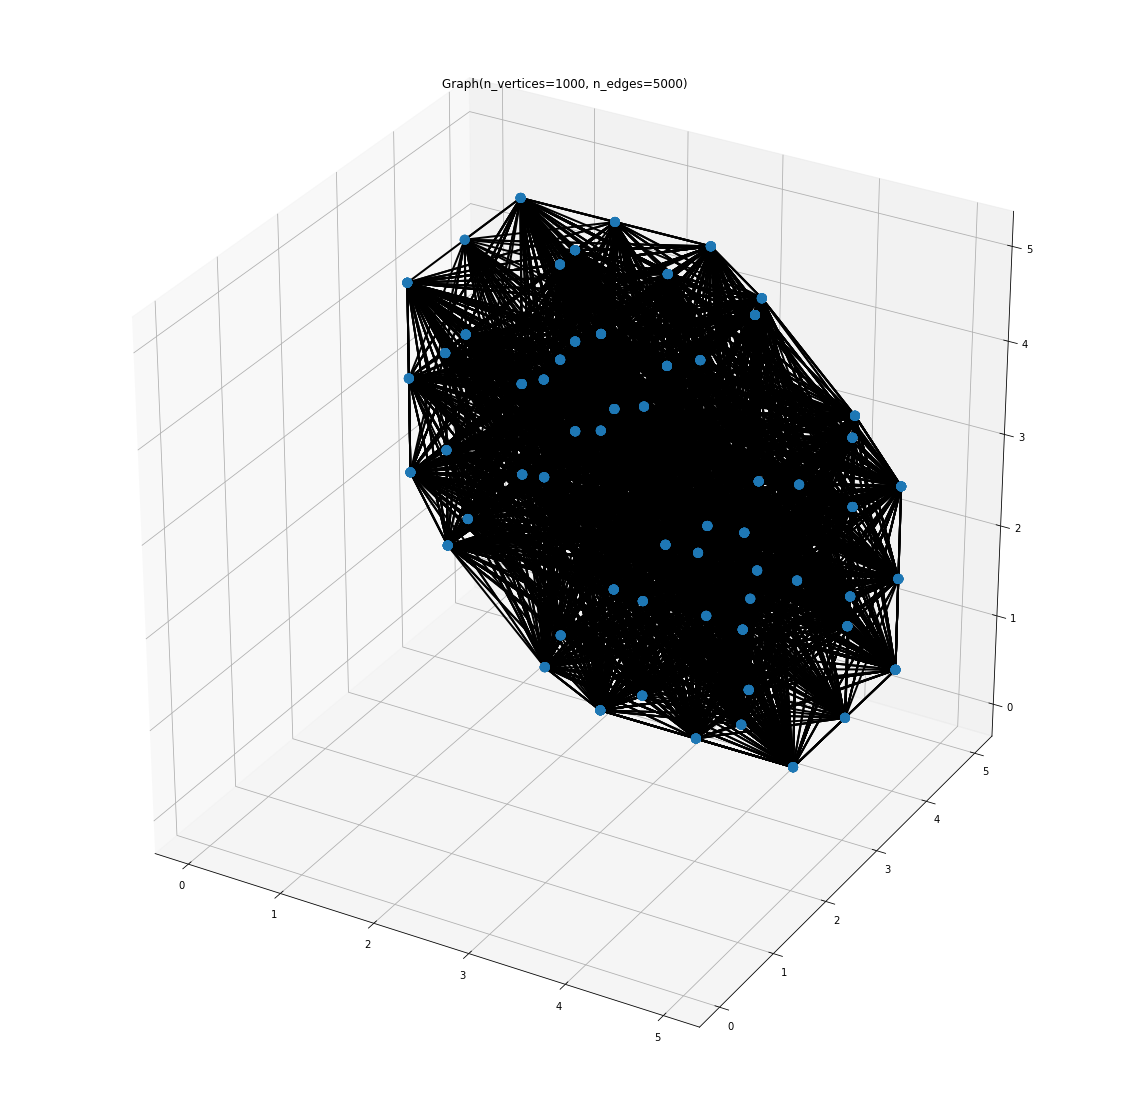

In [33]:
import random

nodes = 1000
edges_per_node = 5

random.sample(range(1, nodes), edges_per_node)  # random 5 neighbours
random.sample(range(1, 6), 3)

adjacency = []
embedding = []
for i in range(nodes):
    adj = np.zeros(nodes)
    np.put(adj, random.sample(range(1, nodes), edges_per_node), np.ones(edges_per_node))  # fill 0s and 1s
    adjacency.append(adj)
    embedding.append(random.sample(range(1, 6), 3))
    
adjacency = np.array(adjacency)
embedding = np.array(embedding) 

print(f"Adjacency shape: {adjacency.shape}")
print(f"Embedding shape: {embedding.shape}")

graph = pygsp.graphs.Graph(adjacency, coords=embedding)
fig, ax = graph.plot(edge_width=2, edge_color='black')
fig.set_figwidth(20)
fig.set_figheight(20)

In [34]:
%matplotlib notebook

adjacency = connections  # kNN matrix, 1 if nodes i and j are neighbours, 0 othervise
embedding = points1      # SO(3) space coordinates

print(f"Adjacency shape: {adjacency.shape}")
print(f"Embedding shape: {embedding.shape}")

graph = pygsp.graphs.Graph(adjacency, coords=embedding)
fig, ax = graph.plot(edges=True, vertex_size=5, edge_width=0.3, edge_color='black')
fig.set_figwidth(7)
fig.set_figheight(7)

Adjacency shape: (5000, 5000)
Embedding shape: (5000, 3)


<IPython.core.display.Javascript object>

In [35]:
adjacency = connections  # kNN matrix, 1 if nodes i and j are neighbours, 0 othervise
embedding = RotationMatrix(data["Angles"])[:,0:3] #points1 

print(f"Adjacency shape: {adjacency.shape}")
print(f"Embedding shape: {embedding.shape}")

graph = pygsp.graphs.Graph(adjacency, coords=embedding)
fig, ax = graph.plot(edge_width=20, edge_color='black')
fig.set_figwidth(20)
fig.set_figheight(20)

Adjacency shape: (5000, 5000)
Embedding shape: (5000, 3)


<IPython.core.display.Javascript object>

---

In [36]:
# build kNN graph directly, where X is the images in pixel space
graph = pygsp.graphs.NNGraph(X)
graph.coords = points1 #embedding

fig, ax = graph.plot(edge_width=2, edge_color='black')
fig.set_figwidth(20)
fig.set_figheight(20)

KeyboardInterrupt: 